## Blockchain                                                                               
Author - Sruti Jain (Version - 1.0)  


#### Blockchain is a digital ledger in which transactions made in bitcoin or another cryptocurrency are recorded chronologically and publicly.

In more general terms, it’s a public database where new data are stored in a container called a block and are added to an immutable chain (hence blockchain) with data added in the past. In the case of Bitcoin and other cryptocurrencies, these data are groups of transactions. But, the data can be of any type, of course.

An important application of blockchain that particularly interest me is Smart Contracts.  

**Smart contracts** help you exchange money, property, shares, or anything of value in a transparent, conflict-free way while avoiding the services of a middleman. Examples of Smart contracts may include: 
    a. Blockchain Healthcare
    b. Blockchain music (patents in research)
    
The other applications of blockchain may include: 
1. **Asset Management**: Trade Processing and Settlement (Visa has implementation beta version of this)
2. **Insurance**: Claims processing
3. **Payments**: Cross-Border Payments (Visa have a blog article explaining this) [Blog Link](https://usa.visa.com/visa-everywhere/innovation/visa-b2b-connect.html)
4. **Smart Property**: Example of smart property includes
    a. Unconventional money lenders/ hard money lending
    b. Your car/ smartphone
5. **Blockchain Internet-of-Things (IoT)**: The security of billion of devices connected together have always been a concerns in IoT. Blockchain ledger system have great application in IoT as it that ensures the information is only accepted and released to trusted parties. Examples can include: 
    a. Smart Appliances
    b. Supply Chain Sensors
6. **Blockchain Identity**: Most companies can sell our identity details or private information to digital advertising companies. Blockchain can essentially block this information by creating a protected data point where you encrypt only the information that you want relevant people to know at certain times. Examples may include
    a. Passports
    b. Birth, wedding, and death certificates
    c. Personal Identification
    

### Block Chain Intuition (Python Imlementation)



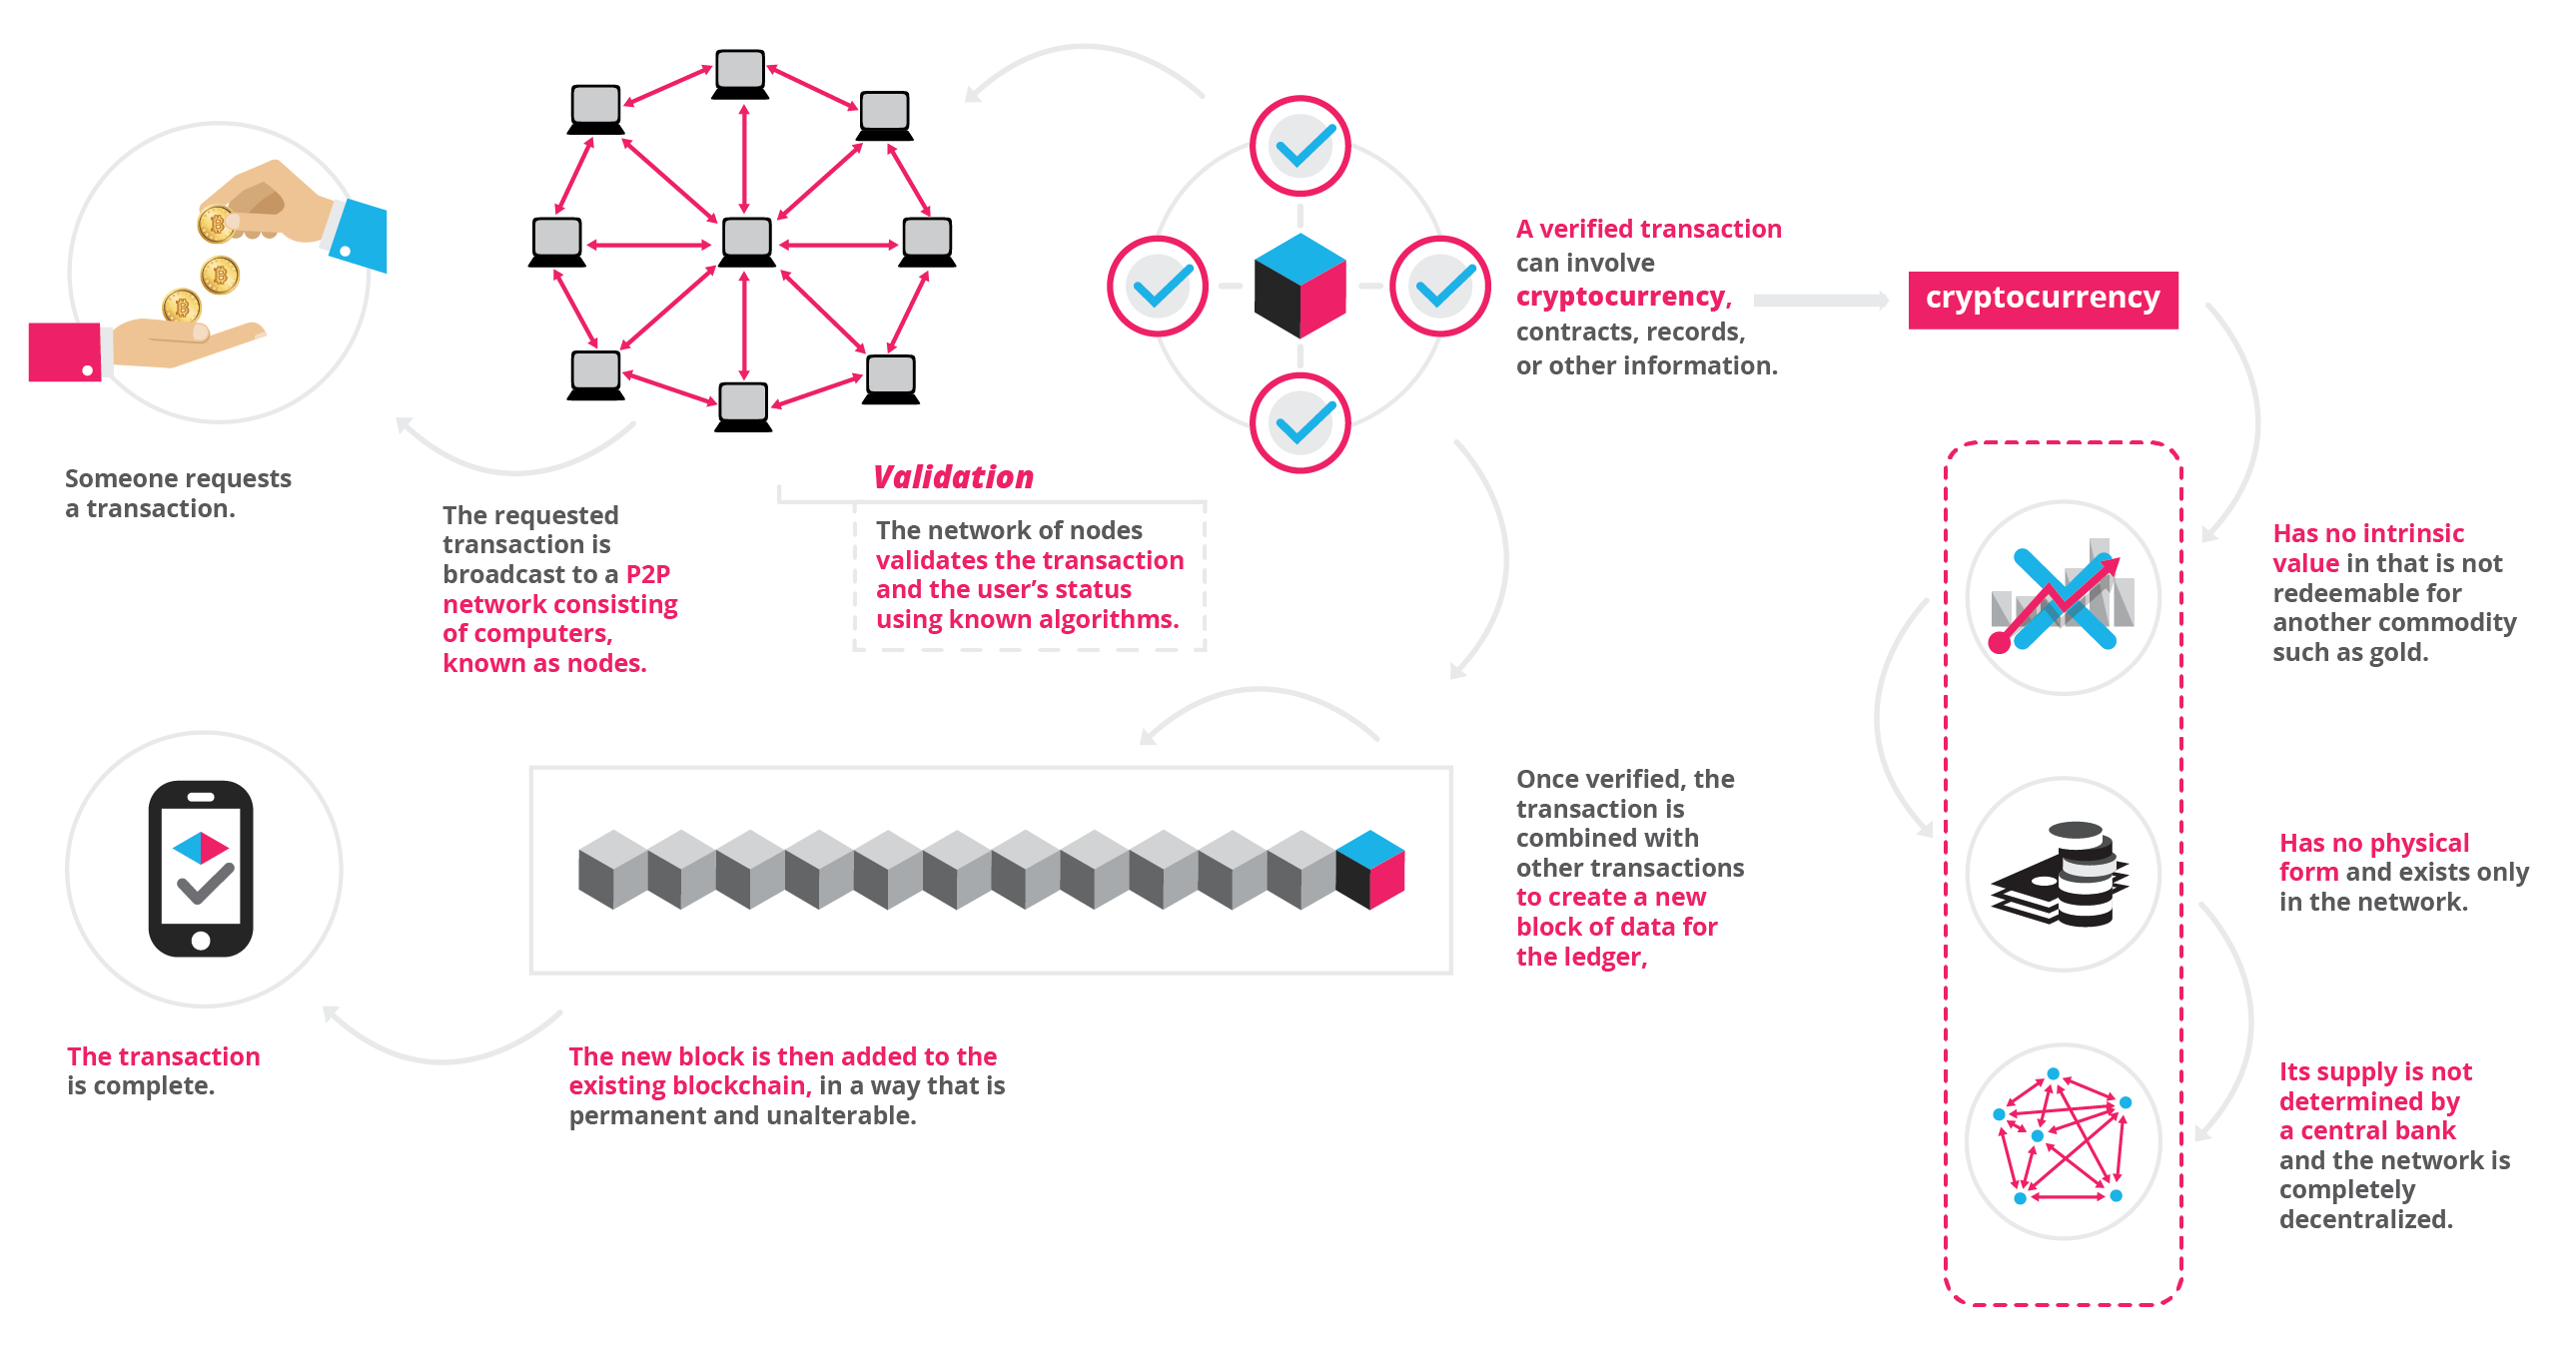

In [5]:
from IPython.display import Image
Image("Blockchain.png")

**Build the basic block for a blockchain**

Let us define our block per the block defined in the first bitcoin paper: [Bitcoin: A Peer-to-Peer Electronic Cash System](https://bitcoin.org/bitcoin.pdf)

Each block is stored as an timestamp and an index which is encrypted using hashing algorithms. So basically cryptocurrencies use an hashing algorithm SHA 256 which converts an arbitrary input of any length to an output which is of 256 bit fix length. 

We will be implementing SHA 256 hashing algorithms in our basic block structure as well. Like Bitcoin, each block’s hash will be a cryptographic hash of the block’s index, timestamp, data, and the hash of the previous block’s hash.

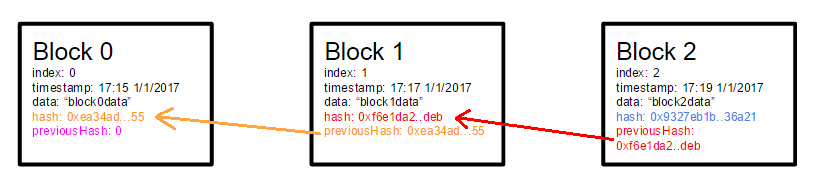

In [13]:
Image("block.png")

In [53]:
# Python Library: We will be using existing SHA256() constructor method available in Hashlib library
import hashlib as hasher

# Let us define the block structure as seen in the figure above
class Block:
    # Definig the constructor for the class Block (__init__ is called when ever an object of the class is constructed)
    # The first argument is Self which indicates or point to the current object
   # Returns a Block object with  index, timestamp, data and previous hash as illustrated in the figure above

    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.hash_block()
    
    def hash_block(self):
        # Using the constructor method available in hashlib to create a SHA256 hash object
        sha = hasher.sha256()
        
        # We can now input the values to this object using update() method
        sha.update((str(self.index) + 
        str(self.timestamp) + 
        str(self.data) + 
        str(self.previous_hash)).encode()) 
        
        # Return the digest of the strings passed to the update() method so far. 
        return sha.hexdigest()

In [52]:
# Understanding of the function Hash_Block defined above with an example:
hasher.sha256(("All you need to know about blockchain").encode()).hexdigest()

'5d5cee426aa58082a20260e678d32df84c8b4f4051df1ff6049a6918951a6a53'

This is how the SHA256 hashing algorithm work at its very basic form. Given any data (in our case it is the string "All you need to know about blockchain", it will convert the output to an fixed 256 bits as printed above. Please note 256 bits is 64 bytes. 

As we now have the structure of the block, we can build a block chain. But the important thing here is how to create the first block. The first block in the bitcoin paper was termed as the Genesis Block. As per the application, this first blocked can either have arbitrary values or have an unique logic associated with it. For simplicity sake, we will just create an Genesis block with arbitrary values. 

In [55]:
import datetime

def create_genesis_block():
  # Manually construct a block with index zero and arbitrary previous hash value of 0 and random string data "Genesis Block"
  return Block(0, datetime.datetime.now(), "Genesis Block", "0")

In [42]:
def next_block(last_block):
  this_index = last_block.index + 1
  this_timestamp = date.datetime.now()
  this_data = "Hey! I'm block " + str(this_index)
  this_hash = last_block.hash
  return Block(this_index, this_timestamp, this_data, this_hash)

In [43]:
# Create the blockchain and add the genesis block
blockchain = [create_genesis_block()]
previous_block = blockchain[0]

# How many blocks should we add to the chain
# after the genesis block
num_of_blocks_to_add = 20

# Add blocks to the chain
for i in range(0, num_of_blocks_to_add):
  block_to_add = next_block(previous_block)
  blockchain.append(block_to_add)
  previous_block = block_to_add
    
  # Tell everyone about it!
  print ("Block #{} has been added to the blockchain!".format(block_to_add.index))
  print ("Hash: {}\n".format(block_to_add.hash))

b218740a61ba9853a251b65931ccfe12e42a9da69b39646eaa668212184cacea
c0899d3b2a07a0b8a3ad8a9cfc3fd8a6fa1f0f9b90719e39620dad5f73f52e6c
Block #1 has been added to the blockchain!
Hash: c0899d3b2a07a0b8a3ad8a9cfc3fd8a6fa1f0f9b90719e39620dad5f73f52e6c

19414e1f604fe04151859fa6b2035853a35c2b1c7bc7718ef59282bb2706dc18
Block #2 has been added to the blockchain!
Hash: 19414e1f604fe04151859fa6b2035853a35c2b1c7bc7718ef59282bb2706dc18

a30987336caecb4db0e6984b41f5a746ae8ac99771107e1e63365a2e5cf5a08c
Block #3 has been added to the blockchain!
Hash: a30987336caecb4db0e6984b41f5a746ae8ac99771107e1e63365a2e5cf5a08c

5447e9fbc4e6201bfb9a660b2476898a98925baf1e78ff31305c67964ce920b1
Block #4 has been added to the blockchain!
Hash: 5447e9fbc4e6201bfb9a660b2476898a98925baf1e78ff31305c67964ce920b1

ece402e1f29f85dff71d6e648ef26289eba0dd6bf4d1fe2d2debd51b095bae3c
Block #5 has been added to the blockchain!
Hash: ece402e1f29f85dff71d6e648ef26289eba0dd6bf4d1fe2d2debd51b095bae3c

d54a4dcdcb1e4854fe3d3b5385985b524ca

**Version - 2.0 implementations**: 
1. Researching and implementing other hash algorithms: md5(), sha1(), sha224(), sha384(), and sha512() and comparing the results with sha256(). 
2. Researching the various logical ways of implementing the Genesis Block which are more application focused. 
3. Ethereum is an open-source, public, blockchain-based distributed computing platform and operating system featuring smart contract functionality - fetching and implementing the same for smart contracts.